---
layout: page
title: Investing
---

In [14]:
""" import library and package dependencies """
import sys
sys.path.insert(0, '../src')
import os
import datetime
import pytz
from collections import namedtuple
from urllib.parse import quote
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import matplotlib.patches as mpatches
from IPython.display import display, Markdown

from data_loader import load_csv_data, get_last_publish_date
from chart_format import StandardChart, PercentileChart

## [S&P 500 Index](spx-prices.html)

The S&P 500 Index from Standard & Poor's is a market-capitalization-weighted index tracking the 500 largest publicly traded companies in the US. 

The S&P 500 is widely considered one of the best gauges of overall stock market performance because of its depth and diversity, tracking the top performing companies by market capitalization.

See [SPX 500 Index](spx-prices.html) for inflation charts, trends and analysis.

## [Inflation](inflation.html)

The Consumer Price Index that the Reserve Bank of Australia use to index inflation is published quarterly, one month after the end of each quarter.

See [inflation](inflation.html) for inflation charts, trends and analysis.

In [15]:
""" Load dataframes from other notebooks """
df_inflation = pd.DataFrame()
df_interest = pd.DataFrame()
df_spx = pd.DataFrame()
%store -r df_inflation
%store -r df_interest
%store -r df_spx

In [16]:
""" Chart variables """
start_date = pd.to_datetime('1960-01-01')
end_date = pd.to_datetime('2025-01-01') # used to force chart to plot to end of 5 year period
#df_spx = df_spx.loc[df_spx.index >= start_date]
#df_inflation = df_inflation.loc[df_inflation.index >= start_date]
price_column = 'rolling_10_years_median'
inflation_column = 'GCPIAGYP'
interest_column = 'FILRHLBVS'
# Set 'last_index' to the last date with a valid value (so I can display 'as of <date>' in chart title)
last_index = df_spx[price_column].last_valid_index()

In [17]:
def add_horizontal_band(plt, legend_location='best'):
    # Add a horizontal band between y=2 and y=3
    plt.fill_between(df_inflation.index, 2, 3, color=colors[1]['color'], alpha=0.1)
    # Create a Patch for the legend
    target_range = mpatches.Patch(color=colors[1]['color'], alpha=0.1, label='Target Inflation Range')
    # Get the existing legend entries
    ax = plt.gca()
    handles, labels = ax.get_legend_handles_labels()
    # Add the patch to the existing handles
    handles.append(target_range)
    plt.legend(handles=handles, loc=legend_location)
    return plt

While inflation may have a direct impact on company profitability and subsequently market prices, there is not a strong correlation between inflation and investment returns.

The S&P 500 Index is reasonably volatility over a multi year time horizon regardless of inflation. 

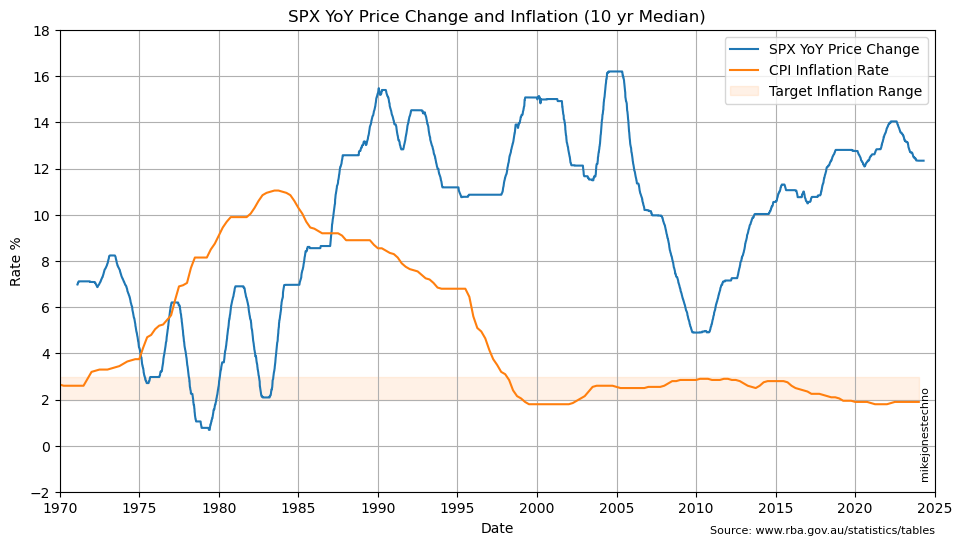

In [18]:
""" Prepare simple chart """

chart_params = {
    'chart_title': 'SPX YoY Price Change and Inflation (10 yr Median)', 
    'chart_source': 'Source: www.rba.gov.au/statistics/tables', 
    'y_label': 'Rate %', 
    'y_ticks': 2,
    'x_label': 'Date', 
    'x_ticks': 5,
    'start_year': 1970,
    'data_column': inflation_column
}

standard_chart = StandardChart(**chart_params)
plt, colors = standard_chart.base_chart(df_inflation)
plt.plot(df_spx.index, df_spx[price_column],color=colors[0]['color'], label='SPX YoY Price Change')
plt.plot(df_inflation.index, df_inflation[price_column], color=colors[1]['color'], label='CPI Inflation Rate')
legend = plt.legend(loc='best')
legend.get_frame().set_alpha(0.98)
plt = add_horizontal_band(plt)

plt.show()

## [Interest Rates](interest-rates.html)

The Housing Loan Lending Rates are set by the Reserve Bank of Australia and published monthly within five business days after month end.

See [interest rates](interest-rates.html) for interest rate charts, trends and analysis.

While commercial borrowing interest rates may have a direct impact on company profitability and subsequently market prices, there is not a strong correlation between interest rates and investment returns.

The S&P 500 Index is reasonably volatility over a multi year time horizon regardless of interest rates.

Although this chart plots the housing loan lending rate, the base rate for commercial borrowing has a similar pattern.

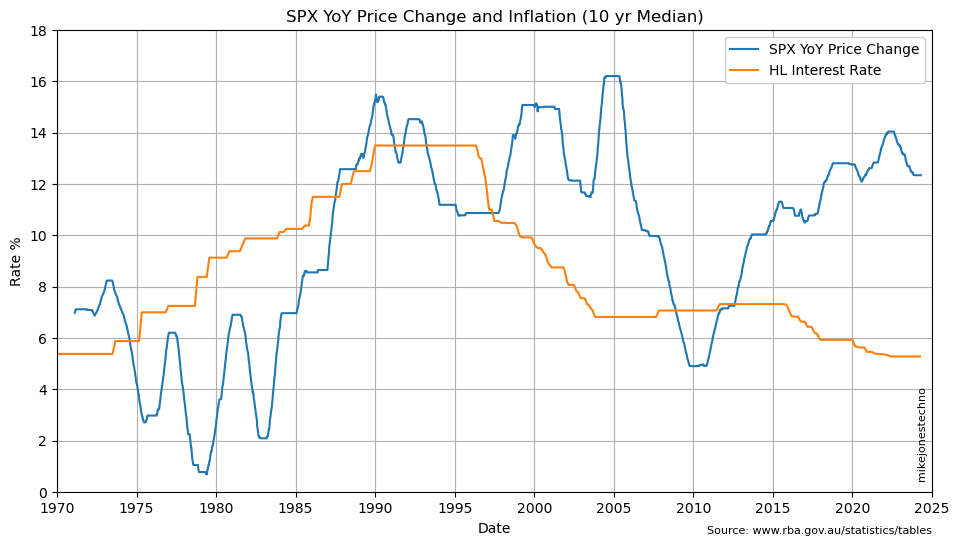

In [19]:
""" Prepare simple chart """

chart_params = {
    'chart_title': 'SPX YoY Price Change and Interest Rates (10 yr Median)', 
    'chart_source': 'Source: www.rba.gov.au/statistics/tables', 
    'y_label': 'Rate %', 
    'y_ticks': 2,
    'x_label': 'Date', 
    'x_ticks': 5,
    'start_year': 1970,
    'data_column': interest_column
}

standard_chart = StandardChart(**chart_params)
plt, colors = standard_chart.base_chart(df_interest)
plt.plot(df_spx.index, df_spx[price_column],color=colors[0]['color'], label='SPX YoY Price Change')
plt.plot(df_interest.index, df_interest[price_column], color=colors[1]['color'], label='HL Interest Rate')
legend = plt.legend(loc='best')
legend.get_frame().set_alpha(0.98)

plt.show()

## General Investing Guidelines

Plotting interest rate and investment YoY change may help provide general investing guidelines. 

When interest rates are higher than investement returns, it may mmake sense to invest in short term treasury bonds rather than make stock investments, particularly when interest rates are high and investment returns are low and uncertain; such as the period between 1975 and 1985. 

In these conditions it makes sense for home owners to borrow on princpal and interest terms to pay down mortgage capital and interest on other loans as quickly as possible because the return on investments may not be sufficient to cover the interest repayments.

When investment returns are higher than interest rates, it makes sense to invest in stocks rather than treasury bonds, particularly when the investment returns are significantly high.

In these conditions it may make sense for home owners to borrow on interest only terms (when available) and defer or minimize pay down of mortgage capital because maximizing the return on investment should more than cover interest and capital repayments.

The size of capital borrowed and invested have significant impact and personal financial situation should be considered with any financial decision.